# Analytical solution for a cantilever beam with a single load at the end

© 2023 Daniel F. Ruiz, Exneyder A. Montoya-Araque and Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/EAFIT_solid_mechanics/blob/main/notebooks/beam_analytic_sol.ipynb).

> Note: Be aware that this notebook follows solid mechanics sign conventions → Tractions are positive, compressions are negative, and shear forces/stresses are positive when they act on the positive $x$-plane and point to the positive $y$-direction.


## Setting up the environment

### Required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from ipywidgets import interact, widgets, fixed

### Global configuration for plots

In [2]:
plt.style.use("default")
mpl.rcParams.update(
    {
        "font.family": "serif",  # Use the Computer modern font
        "font.serif": "cmr10",
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
        "image.cmap": 'PiYG'
    }
)

## Functions

In [3]:
def beam_stress_fields(x, y, load, h, l):
    b = 1
    moi = b * h**3 / 12  # Moment of inertia
    # Stress field
    𝜎_xx = - x * y * load / moi
    𝜎_yy, 𝜎_zz, 𝜏_xz = np.zeros_like(𝜎_xx), np.zeros_like(𝜎_xx), np.zeros_like(𝜎_xx)
    𝜏_xy = -(h ** 2 / 4 - y**2) * load / (2 * moi)
    𝜏_yx = 𝜏_xy
    #Principal stresses
    𝜎_m = (𝜎_xx + 𝜎_yy) / 2
    𝜏_max = np.sqrt(((𝜎_xx - 𝜎_yy) / 2) ** 2 + 𝜏_xy ** 2)
    𝜎_1 = 𝜎_m + 𝜏_max
    𝜎_3 = 𝜎_m - 𝜏_max
    return 𝜎_xx , 𝜎_yy , 𝜏_xy , 𝜎_1 , 𝜎_3 , 𝜎_m, 𝜏_max

def plot_field(x, y, field, **kwargs):
    # Figure
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=[8, 3])
    im = ax.contourf(x, y, field, cmap="RdYlBu_r")
    ax.axis('image')
    ax.set_title(kwargs.get('title'))
    fig.colorbar(im, ax=ax, shrink=0.7)

## Running a case

In [4]:
# Input data
load = 1
h = 1
l = 5

# Nodes
x , y = np.meshgrid(np.linspace(0 , l , 100), np.linspace(-0.5*h, 0.5*h, 100))

# Solver
𝜎_xx , 𝜎_yy , 𝜏_xy , 𝜎_1 , 𝜎_3 , 𝜎_m, 𝜏_max = beam_stress_fields(x, y, load, h, l)

## Plotting the fields

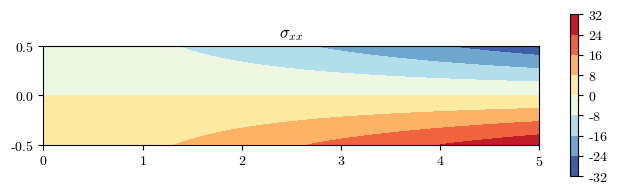

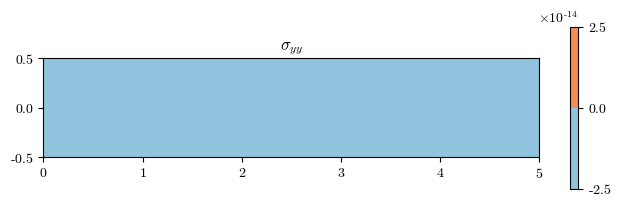

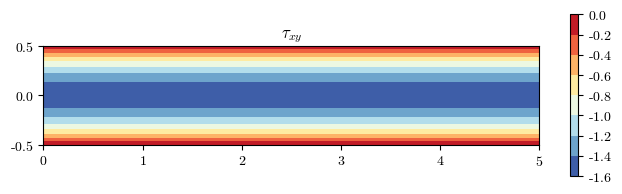

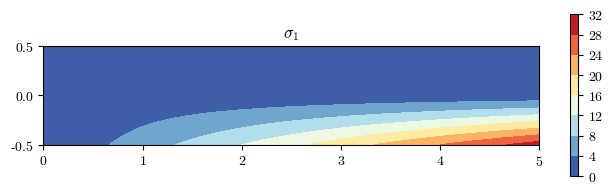

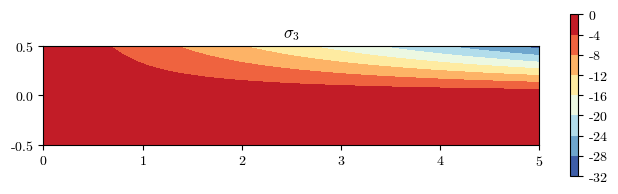

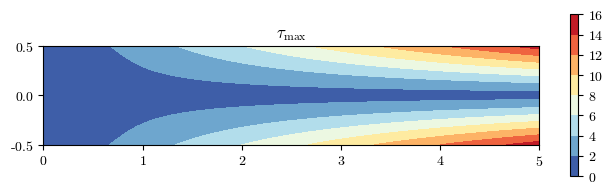

In [5]:
plot_field(x, y, 𝜎_xx, title="$\sigma_{xx}$")
plot_field(x, y, 𝜎_yy, title="$\sigma_{yy}$")
plot_field(x, y, 𝜏_xy, title="$\\tau_{xy}$")
plot_field(x, y, 𝜎_1, title="$\sigma_{1}$")
plot_field(x, y, 𝜎_3, title="$\sigma_{3}$")
plot_field(x, y, 𝜏_max, title="$\\tau_\mathrm{max}$")